In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/updated.csv')
df.head()

,is_home_win,home_form_5,away_form_5,home_form_10,away_form_10,home_form_15,away_form_15,last_home_matches_count,last_away_matches_count,days_off_home,days_off_away,team_abbreviation_home,team_abbreviation_away,is_last_season_champion_home,is_last_season_champion_away,is_regular_season,match_number_season_home,home_over_away_wins_diff_5,home_over_away_wins_diff_10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,NYK,ATL,0.0,0.0,1,1.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,ORL,MIN,0.0,0.0,1,1.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,GSW,POR,0.0,0.0,1,1.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,CLE,NJN,0.0,0.0,1,1.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,CHI,ORL,0.0,0.0,1,1.0,0.0,0.0


In [ ]:
def prob_to_val(proba)

In [10]:
df = df.drop(columns=['team_abbreviation_home', 'team_abbreviation_away'])

In [11]:
X = df.drop('is_home_win', axis=1)
y = df['is_home_win']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.575801749271137
ROC-AUC: 0.49957841483979765


In [15]:
def prob_to_val(proba, threshold):
    return (proba > threshold).astype(int)

In [18]:
y_proba = log_reg.predict_proba(X_test)[:, 1]

best_roc_auc = -1
best_bound = -1
thresholds = np.arange(0.01, 1.0, 0.01)

for threshold in thresholds:
    y_pred_tmp = prob_to_val(y_proba, threshold)
    if roc_auc_score(y_test, y_pred_tmp) > best_roc_auc:
        best_roc_auc = roc_auc_score(y_test, y_pred_tmp)
        best_bound = threshold

print(f'Best ROC-AUC: {best_roc_auc}')
print(f'Best bound: {best_bound}')

Best ROC-AUC: 0.5075339008617356
Best bound: 0.59


In [35]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train_scaled_poly = pd.DataFrame(poly.fit_transform(X_train_scaled))

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X_test_scaled_poly = pd.DataFrame(poly.transform(X_test_scaled))

In [37]:
log_reg_normilized = LogisticRegression(max_iter=10_000)
log_reg_normilized.fit(X_train_scaled_poly, y_train)
y_pred_normilized = log_reg_normilized.predict(X_test_scaled_poly)

print(f'Accuracy: {accuracy_score(y_test, y_pred_normilized)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_normilized)}')

Accuracy: 0.5638969873663752
ROC-AUC: 0.49646052183733774


In [38]:
y_proba_normalized = log_reg_normilized.predict_proba(X_test_scaled_poly)[:, 1]

best_roc_auc_normilized = -1
best_bound_normalized = -1
thresholds = np.arange(0.01, 1.0, 0.01)

for threshold in thresholds:
    y_pred_tmp = prob_to_val(y_proba_normalized, threshold)
    if roc_auc_score(y_test, y_pred_tmp) > best_roc_auc_normilized:
        best_roc_auc_normilized = roc_auc_score(y_test, y_pred_tmp)
        best_bound_normilized = threshold

print(f'Best ROC-AUC: {best_roc_auc_normilized}')
print(f'Best bound: {best_bound_normilized}')

Best ROC-AUC: 0.5073405131735693
Best bound: 0.6


# Вывод
Логистическая регрессия дает предсказание уровня случайного выбора

При попытке нормализации данных лучший показатель ROC-AUC, которого удалось достичь стал немного ниже

Логистическая регрессия не дала эффективного решения

In [25]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [42]:
from catboost import CatBoostClassifier

cat_boost = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=10)

cat_boost.fit(X_train_scaled, y_train)

y_pred_cat = cat_boost.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_cat)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_cat)}')

0:	learn: 0.6901262	total: 1.51ms	remaining: 149ms
10:	learn: 0.6770027	total: 14.6ms	remaining: 118ms
20:	learn: 0.6731629	total: 26.6ms	remaining: 100ms
30:	learn: 0.6703759	total: 38.6ms	remaining: 85.9ms
40:	learn: 0.6682880	total: 50.7ms	remaining: 72.9ms
50:	learn: 0.6662865	total: 62.6ms	remaining: 60.1ms
60:	learn: 0.6640821	total: 77.8ms	remaining: 49.7ms
70:	learn: 0.6619161	total: 94.2ms	remaining: 38.5ms
80:	learn: 0.6599849	total: 109ms	remaining: 25.6ms
90:	learn: 0.6580914	total: 121ms	remaining: 12ms
99:	learn: 0.6560964	total: 133ms	remaining: 0us
Accuracy: 0.5738581146744413
ROC-AUC: 0.49963788155390876


In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

random_forest.fit(X_train_scaled, y_train)

y_pred_forest = random_forest.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred_forest)}')
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_forest)}')

Accuracy: 0.543245869776482
ROC-AUC: 0.4988096987793369


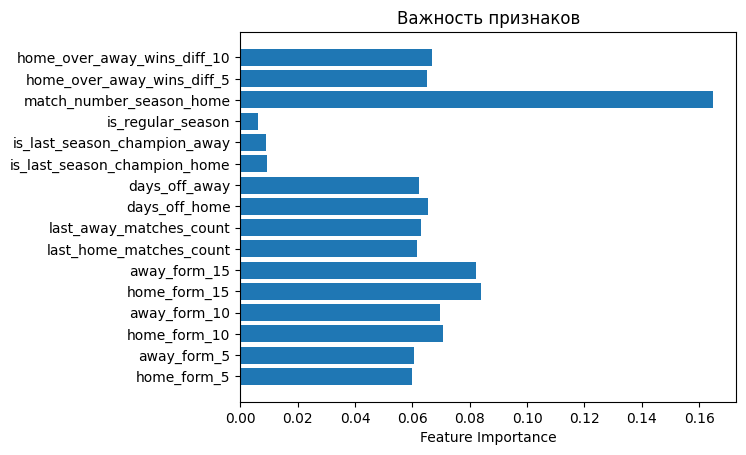

In [46]:
plt.barh(X_test_scaled.columns, random_forest.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Важность признаков')
plt.show()